In [27]:
import pandas as pd
nuovo = pd.read_stata("../dati/td_ita.dta")
nuovo = nuovo[nuovo['first2w'].isin(['First two weeks'])]

In [30]:
pri = set()
for el in nuovo.what:
    pri.add(el)
    
sum(nuovo.what == 'Walking')

1976

In [40]:
nuovo = nuovo[['id', 'date_not','what', 'withw', 'where']]
nuovo.id = nuovo.id.astype(int)
nuovo = nuovo[(nuovo['what'] == 'Sport')  |  (nuovo['what'] == 'Walking')] #| nuovo['what'] == ]

In [45]:
df

,id,date_not,what,withw,where,time_diff
150408,148,2020-11-13 09:00:00,Walking,Other,In the street,NaT
52376,53,2020-11-13 09:00:00,Sport,Alone,Countryside/mountain/hill/beach,0 days 00:00:00
90252,89,2020-11-13 09:00:00,Sport,Friend(s),Countryside/mountain/hill/beach,0 days 00:00:00
33438,33,2020-11-13 09:00:00,Walking,Friend(s),In the street,0 days 00:00:00
170461,169,2020-11-13 09:30:00,Walking,Alone,Home garden/patio/courtyard,0 days 00:30:00
...,...,...,...,...,...,...
184656,185,2020-11-30 20:00:00,Sport,Alone,Home apartment /room,0 days 00:00:00
76599,75,2020-11-30 21:00:00,Sport,Alone,Relatives Home,0 days 01:00:00
245927,243,2020-11-30 21:00:00,Walking,Other,Another outdoor place,0 days 00:00:00
210279,209,2020-11-30 21:00:00,Walking,Friend(s),In the street,0 days 00:00:00


In [43]:
df = nuovo
df['date_not'] = pd.to_datetime(df['date_not'])
df = df.sort_values('date_not')
df['time_diff'] = df['date_not'].diff()
new_session = (df['time_diff'] > pd.Timedelta(minutes=30)) | df['time_diff'].isnull()
session_id = new_session.cumsum()

In [55]:
grouped = df.groupby(['id', session_id])
collapsed_sessions = grouped.agg(
    start_time=('date_not', 'first'),
    end_time=('date_not', 'last'),
    duration=('date_not', lambda x: ((x.max() - x.min()).total_seconds() / 60)+30),
    where=('where', 'first'),
    what=('what', 'last')
).reset_index()

<Axes: >

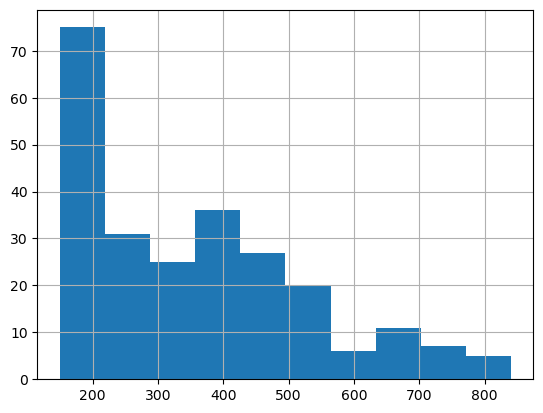

In [81]:
collapsed_sessions[(collapsed_sessions.what == 'Walking') & (collapsed_sessions.duration > collapsed_sessions.duration.mean())].duration.hist()

128.7015945330296

In [82]:
collapsed_sessions.to_csv("sport_activity_sessions_collapsed.csv")